In [124]:
#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템 : 쓸수도 있고 안쓸수도 있지만 일단 가져오기
import os  # 시스템 : 쓸수도 있고 안쓸수도 있지만 일단 가져오기

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bs4 import BeautifulSoup    # html 데이터를 전처리 # 아직안씀
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
import csv
#from tqdm import tqdm_notebook   # tqdm이전 버전의 사용 방법. 버전이 완전히 바뀌면 아래 코드만을 사용해야 합니다.
from tqdm.notebook import tqdm    # for문 돌릴 때 진행상황을 %게이지로알려줍니다.
from selenium.webdriver.common.by import By
from konlpy.tag import *

# 한글 시각화
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 데이터 크롤링 & 데이터 전처리

In [125]:
# 크롬드라이버 열기
driver = webdriver.Chrome('chromedriver') # 크롬드라이버 경로
driver.maximize_window() # 크롬창 크기 최대

# 작성할 'testdata.csv' 파일을 생성하여 변수 'f'에 저장
f = open('testdata.csv', 'w', newline = '')

# CSV 파일을 작성하는 객체 변수 'wtr' 생성
wtr = csv.writer(f)

# 열 제목 작성
wtr.writerow(['제목', '가수', '가사', '전처리'])

# 2021
melon_chart = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100&steadyYn=Y#params%5BgnrCode%5D=GN0100&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=Y&po=pageObj&startIndex=1"
driver.get(melon_chart)
time.sleep(1)

# 1위 - 50위
for i in range(50):
    # 제목
    xpath1 = "/html/body/div/div[3]/div/div/div[5]/form/div/table/tbody/tr[" + str(i+1) + "]/td[5]/div/div/div[1]/span/a"
    title = driver.find_element(By.XPATH, xpath1).text

    # 가수
    xpath2 = "/html/body/div/div[3]/div/div/div[5]/form/div/table/tbody/tr[" + str(i+1) + "]/td[5]/div/div/div[2]/a"
    singer = driver.find_element(By.XPATH, xpath2).text
    singer = singer.replace('\xc9', 'E') # 로제 (ROSÉ) -> 로제 (ROSE)

    # 버튼
    xpath3 = "/html/body/div/div[3]/div/div/div[5]/form/div/table/tbody/tr[" + str(i+1) + "]/td[4]/div/a"
    button = driver.find_element(By.XPATH, xpath3)
    button.click()
    time.sleep(1)

    # 가사
    xpath4 = "/html/body/div[1]/div[3]/div/div/div/div[2]/div[2]/div"
    lyrics = driver.find_element(By.XPATH, xpath4).text

    # 전처리
    kkma = Kkma()

    # 토큰화
    token = kkma.morphs(lyrics)

    # 태깅
    tagging_kkma = []
    for i in token:
        tag_word = kkma.pos(i)
        tagging_kkma.append(tag_word)

    # 불용어처리
    new_tagging = []
    for i in range(len(tagging_kkma)):
        for word, tag in tagging_kkma[i]:
            if tag not in ['SF', 'SP', 'SS', 'SE', 'SO', 'SW', 'UN', 'OH', 'ON']:
                new_tagging.append(word)

    # csv 파일 기록
    wtr.writerow([i+1, title, singer, lyrics, new_tagging])

    # 뒤로 가기
    driver.back()
    time.sleep(1)

driver.close()

f.close()

In [156]:
# 데이터프레임 불러오기
df = pd.read_csv("testdata.csv", encoding='cp949')
df

,제목,가수,가사,전처리
257,바람이 불었으면 좋겠어,길구봉구,웃는 모습이 너무 아름다운\n그런 너를 기억하면서\n괜찮아 넌 잘할거라 말하던\n또...,"['웃', '늘', 'ㄴ', '모습', '이', '너무', '아름답', 'ㄴ', '..."
293,내 손을 잡아,아이유,느낌이 오잖아\n\n떨리고 있잖아\n\n언제까지 눈치만 볼 거니\n\n네 맘을 말해...,"['느낌', '이', '오', '아', '떨리', '고', '있', '아', '언제..."
313,이 소설의 끝을 다시 써보려 해,한동근,시계가 반대로 돌아가고 있어\nTV속 영화가 되감아지고 있어\n내렸던 빗물이 올라가...,"['시계', '가', '반대', '로', '돌아가', '고', '있', '어', '..."
402,봄 사랑 벚꽃 말고,HIGH4 (하이포),길었던 겨우내 줄곧 품이 좀 남는\n밤색 코트\n그 속에 나를 쏙 감추고 걸음을\n...,"['긷', '어', '었', '더', 'ㄴ', '겨우내', '줄곧', '품', '이..."
305,Timeless,SG 워너비,어쩜 살아가다 보면 한 번은 날 찾을지 몰라\n나 그 기대 하나로 오늘도 힘겹게 버...,"['어쩜', '살아가', '다', '보', '면', '한', '벌', 'ㄴ', '은..."
253,금요일에 만나요 (Feat. 장이정 Of HISTORY),아이유,월요일엔 아마 바쁘지 않을까\n화요일도 성급해 보이지 안 그래\n수요일은 뭔가 어정...,"['월요일', '에', '늘', 'ㄴ', '아마', '바쁘', '지', '않', '..."
248,너의 모든 순간 (Original),성시경,이윽고 내가 한눈에\n너를 알아봤을 때\n모든 건 분명 달라지고 있었어\n내 세상은...,"['이윽고', '나', '가', '한눈', '에', '널', '알아보', '아', ..."
267,너의 의미 (Feat. 김창완),아이유,너의 그 한 마디 말도 그 웃음도\n나에겐 커다란 의미\n너의 그 작은 눈빛도\n쓸...,"['널', '의', '그', '한', '마디', '말', '도', '그', '웃음'..."
528,우연히 봄,로꼬,우연히 내게 오나봐\n봄 향기가 보여\n너도 같이 오나봐\n저 멀리서 니 향기가\n...,"['우연히', '내', '게', '오나', '보', '아', '봄', '향기', '..."
185,걱정말아요 그대,이적,그대여 아무 걱정 하지 말아요\n우리 함께 노래 합시다\n그대 아픈 기억들 모두 그...,"['그', '대이', '어', '아물', '걱정', '하', '지', '말', '아..."


In [157]:
# 노래 수 출력
print(len(df))

50


In [158]:
# 리뷰 길이 분포 확인
print('가사의 최대 길이 :',max(len(lyric) for lyric in df['전처리']))
print('가사의 평균 길이 :',sum(map(len, df['전처리']))/len(df['전처리']))
plt.hist([len(lyric) for lyric in df['전처리']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

가사의 최대 길이 : 3037


TypeError: 'int' object is not callable

In [136]:
df.loc[df['가수'] == '아이유', '가사']

293    느낌이 오잖아\n\n떨리고 있잖아\n\n언제까지 눈치만 볼 거니\n\n네 맘을 말해...
253    월요일엔 아마 바쁘지 않을까\n화요일도 성급해 보이지 안 그래\n수요일은 뭔가 어정...
267    너의 그 한 마디 말도 그 웃음도\n나에겐 커다란 의미\n너의 그 작은 눈빛도\n쓸...
231    모두 잠드는 밤에\n혼자 우두커니 앉아\n다 지나버린 오늘을\n보내지 못하고서 깨어...
166    쓸쓸하던 그 골목을 당신은\n기억하십니까\n지금도 난 기억합니다\n사랑한단 말 못하...
Name: 가사, dtype: object

### word2vec 모델 학습

In [178]:
df['전처리']

257    ['웃', '늘', 'ㄴ', '모습', '이', '너무', '아름답', 'ㄴ', '...
293    ['느낌', '이', '오', '아', '떨리', '고', '있', '아', '언제...
313    ['시계', '가', '반대', '로', '돌아가', '고', '있', '어', '...
402    ['긷', '어', '었', '더', 'ㄴ', '겨우내', '줄곧', '품', '이...
305    ['어쩜', '살아가', '다', '보', '면', '한', '벌', 'ㄴ', '은...
253    ['월요일', '에', '늘', 'ㄴ', '아마', '바쁘', '지', '않', '...
248    ['이윽고', '나', '가', '한눈', '에', '널', '알아보', '아', ...
267    ['널', '의', '그', '한', '마디', '말', '도', '그', '웃음'...
528    ['우연히', '내', '게', '오나', '보', '아', '봄', '향기', '...
185    ['그', '대이', '어', '아물', '걱정', '하', '지', '말', '아...
331    ['니', '가', '없', '늘', 'ㄴ', '거리', '에', '늘', 'ㄴ',...
399    ['세상', '이', '어두', '어', '지', '고', '조용히', '비', '...
299    ['아픔', '이', '좀', '더', '작아지', '의미', '없', '늘', '...
314    ['그대', '늘', 'ㄴ', '참', '아름답', '어', '어요', '밤', '...
344    ['널', '늘', 'ㄴ', '어', '어', '때', '어', '었', '는', ...
344    ['마치', '어제', '만나', 'ㄴ', '것', '처', '럼', '자', 'ㄹ...
134    ['내', '곁', '에', '만', '머물', '떠나', '면', '안되', '어...
271    ['오늘', '은', '뭔', '가', '좀

In [179]:
from gensim.models import word2vec

model_kkma = word2vec.Word2Vec(sentences = df['전처리'], vector_size=100, window=5, min_count=5, sg=1)

In [180]:
# 완성된 임베딩 매트릭스의 크기 확인
model_kkma.wv.vectors.shape

(385, 100)

In [181]:
# 단어 사전 수
len(model_kkma.wv.key_to_index)

385

In [182]:
print(model_kkma.wv.most_similar("사랑"))

KeyError: "Key '사랑' not present"

In [183]:
lyric_emotion = ['사랑', '즐거움', '열정', '행복', '슬픔', '분노', '외로움', '그리움', '두려움']
emotion_list = [] # 4개의 감정 단어가 담길 리스트
for index in range(len(lyric_emotion)):
    emotion_one = [] #1개의 감정 단어가 담길 리스트
    for word in model_kkma.wv.most_similar(lyric_emotion[index]):
        if(word[1] >= 0.5): # 튜플형식, 1번째 인덱스의 유사도와 비교
            emotion_one.append(word)
        emotion_list.append(emotion_one)

KeyError: "Key '사랑' not present"

In [146]:
data_test = ['잘', '지내', '보이', '어', '너', '는', '아무', '일',
'없', '는', '듯', '참', '분주', '하', '어', '보이', '어']

data_dic = {lyric_emotion[0]:0, lyric_emotion[1]:0, lyric_emotion[2]:0,
lyric_emotion[3]:0}

In [147]:
for k in range(len(lyric_emotion)):
    for i in emotion_list[k]:
        for j in range(len(data_test)):
            if i[0] == data_test[j]:
                print(i[1])
                data_dic[lyric_emotion[k]]= data_dic[lyric_emotion[k]]+i[1]
print(data_dic)

IndexError: list index out of range

In [148]:
def whatIsBest(x):
    return data_dic[x]
    
best_emotion = max(data_dic.keys(), key = whatIsBest)
print(best_emotion, data_dic[best_emotion])

사랑 0


In [149]:
emotion_one

[]

In [150]:
model_kkma.wv.most_similar('상처')

KeyError: "Key '상처' not present"

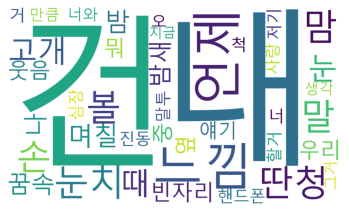

In [79]:
# wordcloud 시각화 (예시)
from nltk import Text
kolaw = Text(kkma.nouns(df['가사'][1]), name="kolaw")

from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 ttf폰트 경로 설정
font_path = "C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(width=1000, height=600,
               background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()